In [1]:
import pandas as pd

df = pd.read_csv('../data/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="darkgrid")

In [3]:
# Basic Info
df.info()

# Shape of the data
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

# Column names
print(df.columns)

# Null values
df.isnull().sum()

# Data types
df.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Rows: 8807
Columns: 12
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [4]:
# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Strip whitespace in column names (just in case)
df.columns = df.columns.str.strip()

# Fill missing values or drop rows
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df['date_added'] = df['date_added'].fillna('Unknown')
df['director'] = df['director'].fillna('Not Available')

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


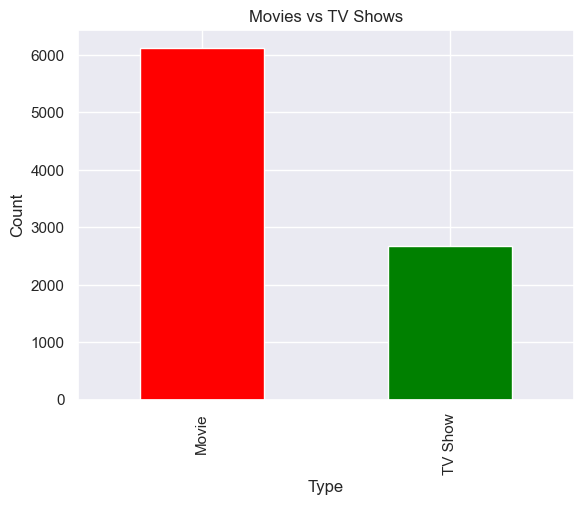

In [5]:
df['type'].value_counts().plot(kind='bar', title='Movies vs TV Shows', color=['red', 'green'])
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


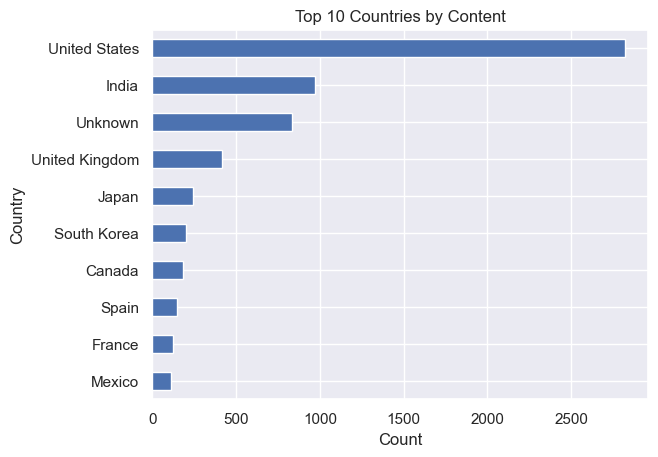

In [6]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries by Content')
plt.xlabel("Count")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()


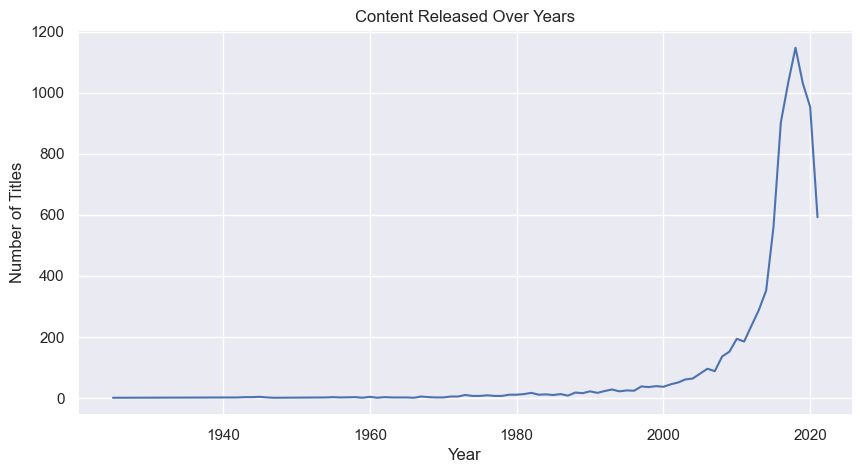

In [7]:
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5), title='Content Released Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


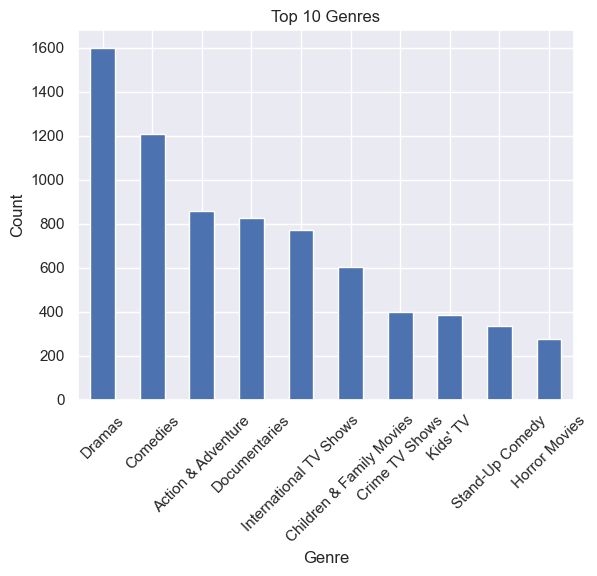

In [8]:
# Extract first genre from 'listed_in'
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

df['main_genre'].value_counts().head(10).plot(kind='bar', title='Top 10 Genres')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


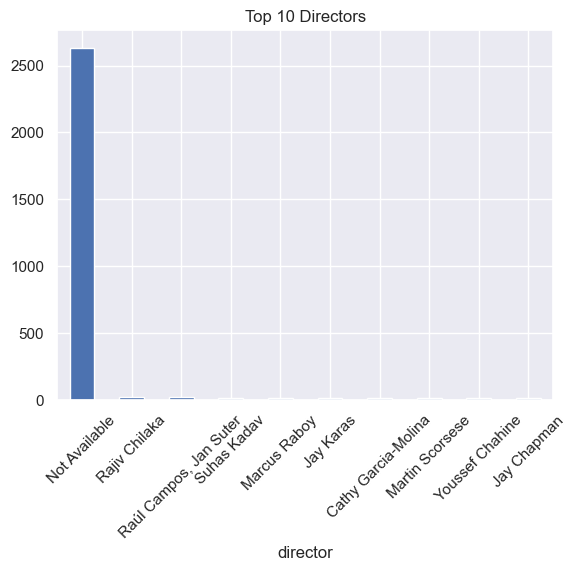

In [9]:
df['director'].value_counts().head(10).plot(kind='bar', title='Top 10 Directors')
plt.xticks(rotation=45)
plt.show()


In [10]:
df['release_year'].value_counts().idxmax()


np.int64(2018)

In [11]:
from collections import Counter

all_actors = df['cast'].dropna().apply(lambda x: x.split(', '))
flat_list = [actor for sublist in all_actors for actor in sublist]
Counter(flat_list).most_common(10)


[('Anupam Kher', 43),
 ('Shah Rukh Khan', 35),
 ('Julie Tejwani', 33),
 ('Naseeruddin Shah', 32),
 ('Takahiro Sakurai', 32),
 ('Rupa Bhimani', 31),
 ('Akshay Kumar', 30),
 ('Om Puri', 30),
 ('Yuki Kaji', 29),
 ('Amitabh Bachchan', 28)]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          7982 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8709 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
 12  main_genre    8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [13]:
df.isnull().sum()


show_id           0
type              0
title             0
director          0
cast            825
country           0
date_added       98
release_year      0
rating            0
duration          3
listed_in         0
description       0
main_genre        0
dtype: int64

In [14]:
df.nunique()


show_id         8807
type               2
title           8807
director        4529
cast            7692
country          749
date_added      1699
release_year      74
rating            18
duration         220
listed_in        514
description     8775
main_genre        36
dtype: int64

In [15]:
df.describe()


,date_added,release_year
count,8709,8807.000000
mean,2019-05-23 01:45:29.452290816,2014.180198
min,2008-01-01 00:00:00,1925.000000
25%,2018-04-20 00:00:00,2013.000000
50%,2019-07-12 00:00:00,2017.000000
75%,2020-08-26 00:00:00,2019.000000
max,2021-09-25 00:00:00,2021.000000
std,NaN,8.819312
